## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [2]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [3]:
# Your code here . . .
mammals = euk[euk['Class'] == 'Mammals'].copy()
mammals['Number of genes'] = pd.to_numeric(mammals['Number of genes'], errors = 'coerce')
mammals_20000_genes = mammals[mammals['Number of genes'] >= 20000]
scientific_names = mammals_20000_genes['Species']
print(f"There are {len(scientific_names)} mammals that have at least 20000 genes. Their scientific names are {scientific_names.tolist()}.")
print(scientific_names)

There are 134 mammals that have at least 20000 genes. Their scientific names are ['Homo sapiens', 'Mus musculus', 'Rattus norvegicus', 'Felis catus', 'Bos taurus', 'Ovis aries', 'Canis lupus familiaris', 'Sus scrofa', 'Ornithorhynchus anatinus', 'Equus caballus', 'Pan troglodytes', 'Macaca mulatta', 'Monodelphis domestica', 'Loxodonta africana', 'Sorex araneus', 'Erinaceus europaeus', 'Cavia porcellus', 'Echinops telfairi', 'Dasypus novemcinctus', 'Oryctolagus cuniculus', 'Pongo abelii', 'Canis lupus dingo', 'Papio anubis', 'Callithrix jacchus', 'Otolemur garnettii', 'Ictidomys tridecemlineatus', 'Nomascus leucogenys', 'Myotis lucifugus', 'Pteropus vampyrus', 'Tursiops truncatus', 'Microcebus murinus', 'Dipodomys ordii', 'Macaca fascicularis', 'Ochotona princeps', 'Bubalus bubalis', 'Galeopterus variegatus', 'Vicugna pacos', 'Gorilla gorilla gorilla', 'Ailuropoda melanoleuca', 'Cricetulus griseus', 'Sarcophilus harrisii', 'Mustela putorius furo', 'Bos indicus', 'Odocoileus virginianus 

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [4]:
# Your code here . . .
animals = euk[euk['Kingdom'] == 'Animals']
class_num = animals['Class'].value_counts()
print('For each class of animals, there are this many records: ')
print(class_num)

For each class of animals, there are this many records: 
Class
Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Roundworms       162
Flatworms         47
Reptiles          41
Amphibians         7
Name: count, dtype: int64


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [5]:
# Your code here . . .
animals = euk[euk['Kingdom'] == 'Animals']
unique_species = animals.groupby('Class')['Species'].unique()
print("For each class of animals there are this many unique species: ")
print(unique_species)

For each class of animals there are this many unique species: 
Class
Amphibians       [Xenopus tropicalis, Xenopus laevis, Ambystoma...
Birds            [Gallus gallus, Meleagris gallopavo, Coturnix ...
Fishes           [Danio rerio, Takifugu rubripes, Gasterosteus ...
Flatworms        [Schmidtea mediterranea, Schistosoma mansoni, ...
Insects          [Aedes aegypti, Aedes albopictus, Anopheles ga...
Mammals          [Homo sapiens, Mus musculus, Rattus norvegicus...
Other Animals    [Ciona intestinalis, Ciona savignyi, Branchios...
Reptiles         [Anolis carolinensis, Sphenodon punctatus, Pog...
Roundworms       [Caenorhabditis briggsae, Caenorhabditis elega...
Name: Species, dtype: object


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [7]:
# Your code here . . .
mammals = euk[euk['Class'] == 'Mammals'].copy()
mammals['Genus'] = mammals['Species'].str.split().str[0]
macaca_name = mammals[mammals['Genus'] == 'Macaca']
unique_names = macaca_name['Species'].unique()
print('Here are the unique scientific names of Mammals with the genus name Macaca: ')
print(unique_names)

Here are the unique scientific names of Mammals with the genus name Macaca: 
['Macaca mulatta' 'Macaca fascicularis' 'Macaca nemestrina'
 'Macaca fuscata fuscata']


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [15]:
# Your code here . . .
euk['Species'] = euk['Species'].str.split().str[:2].str.join(' ')
df_species = euk[['Kingdom', 'Class', 'Species', 'Size (Mb)', 'Number of genes', 'Number of proteins']]
print(df_species)

       Kingdom           Class Species   Size (Mb) Number of genes  \
0     Protists  Other Protists       M  167.676000           38549   
1       Plants     Land Plants     NaN  119.669000           38311   
2       Plants     Land Plants     NaN  979.046000           59847   
3       Plants     Land Plants     NaN  412.924000           37603   
4       Plants     Land Plants     NaN  828.349000           31200   
...        ...             ...     ...         ...             ...   
8297     Fungi     Ascomycetes     NaN    3.993920               -   
8298     Fungi     Ascomycetes     NaN    0.586761             155   
8299     Fungi     Ascomycetes     NaN   12.020400               -   
8300     Fungi     Ascomycetes     NaN   11.960900               -   
8301     Fungi     Ascomycetes     NaN   11.820700               -   

     Number of proteins  
0                 38554  
1                 48265  
2                 71219  
3                 41939  
4                 37660  
...

### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [16]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
import pandas as pd
df_unique_species = df_species.groupby('Class')['Species'].nunique().reset_index()
df_unique_species.columns = ['Class', 'Unique Species Count']
df_unique_species.set_index('Class', inplace = True)
print(df_unique_species)


                Unique Species Count
Class                               
Amphibians                         0
Apicomplexans                     37
Ascomycetes                       48
Basidiomycetes                    36
Birds                             11
Fishes                             3
Flatworms                          0
Green Algae                       17
Insects                           17
Kinetoplasts                      18
Land Plants                        9
Mammals                           17
Other                              6
Other Animals                      4
Other Fungi                       29
Other Plants                       0
Other Protists                    30
Reptiles                           3
Roundworms                         5


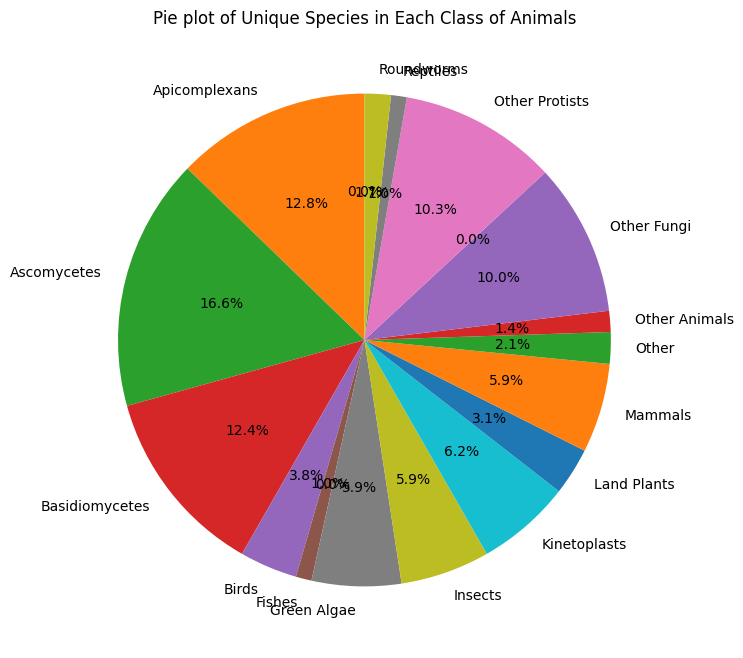

In [19]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
import matplotlib.pyplot as plt

df_unique_species.plot.pie(y='Unique Species Count', autopct='%1.1f%%', figsize=(8, 8), startangle=90, legend=False)
plt.title('Pie plot of Unique Species in Each Class of Animals')
plt.ylabel('')
plt.show()